In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [11]:
# Loading CIFAR-100 dataset
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar100.load_data()

# Cast Records into Float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# CIFAR-100 class names
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
               'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
               'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp',
               'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
               'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
               'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal',
               'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
               'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',
               'whale', 'willow_tree', 'wolf', 'woman', 'worm']



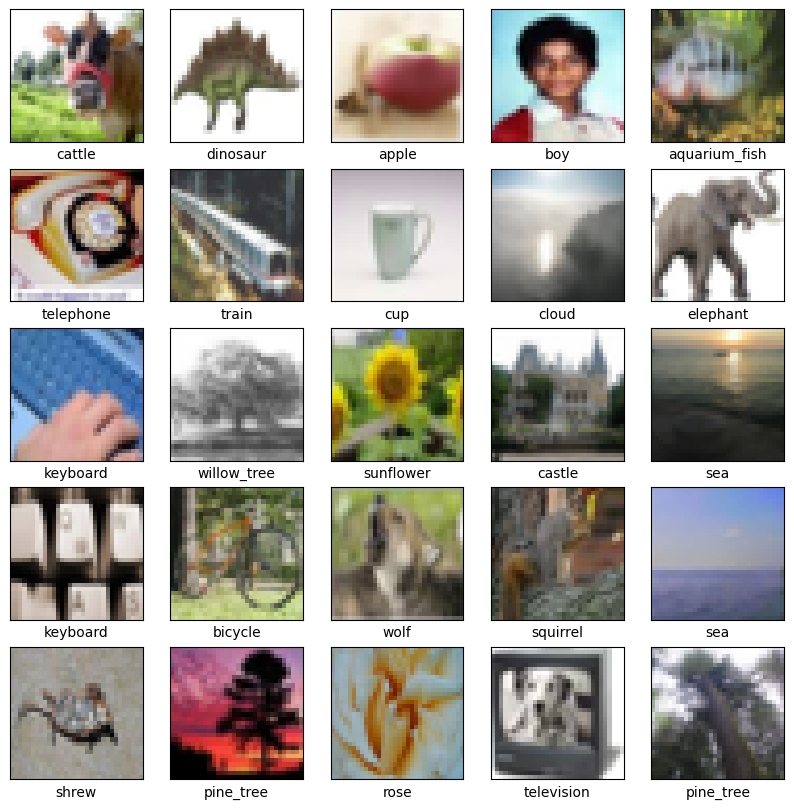

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 634,700 (2.42 MB)

 Trainable params: 634,700 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0354 - loss: 4.4821 - val_accuracy: 0.0852 - val_loss: 4.0450
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1034 - loss: 3.9316 - val_accuracy: 0.1189 - val_loss: 3.8448
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1255 - loss: 3.7816 - val_accuracy: 0.1332 - val_loss: 3.7564
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1426 - loss: 3.6905 - val_accuracy: 0.1381 - val_loss: 3.7295
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1571 - loss: 3.6333 - val_accuracy: 0.1550 - val_loss: 3.6673
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1655 - loss: 3.5844 - val_accuracy: 0.1660 - val_loss: 3.6145
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1773 - loss: 3.5302 - val_accuracy: 0.1634 - val_loss: 3.6068
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1808 - loss: 3.5060 - val_accuracy: 0

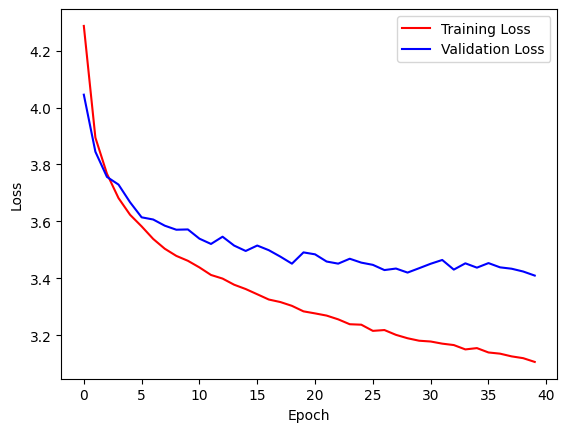

In [13]:
# Defining ANN model for CIFAR-100 dataset
ann_model = tf.keras.Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(200, activation='relu'),
    Dense(100, activation='softmax'),
])

ann_model.summary()

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_ann = ann_model.fit(x_train, y_train, epochs=40, batch_size=256, validation_split=0.2)

# Plot training & validation loss
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
plt.figure()
plt.plot(history_ann.epoch, loss, 'r', label='Training Loss')
plt.plot(history_ann.epoch, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [14]:
# Evaluate model
results_ann = ann_model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results_ann)

# CNN model for CIFAR-100 dataset
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

cnn_model.summary()


Test loss, Test accuracy: [3.4128270149230957, 0.21040000021457672]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train, y_train, epochs=25, batch_size=275, validation_split=0.2)


Epoch 1/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.0246 - loss: 4.4691 - val_accuracy: 0.0721 - val_loss: 4.0980
Epoch 2/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0918 - loss: 3.9571 - val_accuracy: 0.1364 - val_loss: 3.7213
Epoch 3/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1488 - loss: 3.6242 - val_accuracy: 0.1671 - val_loss: 3.5246
Epoch 4/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1901 - loss: 3.4034 - val_accuracy: 0.1978 - val_loss: 3.3504
Epoch 5/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2199 - loss: 3.2405 - val_accuracy: 0.2213 - val_loss: 3.2426
Epoch 6/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2355 - loss: 3.1249 - val_accuracy: 0.2341 - val_loss: 3.1843
Epoch 7/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2591 - loss: 3.0253 - val_accuracy: 0.2489 - val_loss: 3.1085
Epoch 8/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2773 - loss: 2.9475 - val_accuracy:

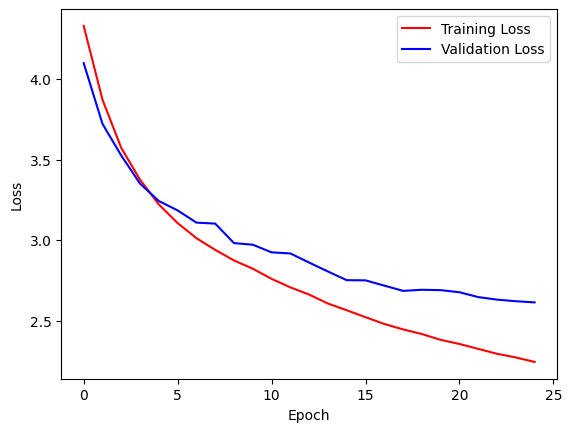

Test loss, Test accuracy: [2.5979321002960205, 0.34450000524520874]


In [16]:
# Plot training & validation loss for CNN model
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
plt.figure()
plt.plot(history_cnn.epoch, loss, 'r', label='Training Loss')
plt.plot(history_cnn.epoch, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model
results_cnn = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results_cnn)


In [17]:
# Loading CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Load VGG16 model without the top layer (include_top=False)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base to prevent its weights from being updated during training
vgg_base.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [18]:
# Add custom layers on top of the VGG16 base
transfer_model = models.Sequential([
    vgg_base,  # Pre-trained VGG16 model
    layers.Flatten(),  # Flatten the output from VGG16
    layers.Dense(256, activation='relu'),  # Add dense layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(100, activation='softmax')  # CIFAR-100 has 100 classes
])

# Compile the model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.0629 - loss: 4.3310 - val_accuracy: 0.2130 - val_loss: 3.3748
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.1813 - loss: 3.4425 - val_accuracy: 0.2542 - val_loss: 3.0906
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2335 - loss: 3.1655 - val_accuracy: 0.2835 - val_loss: 2.9588
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2474 - loss: 3.0543 - val_accuracy: 0.2945 - val_loss: 2.8878
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2676 - loss: 2.9633 - val_accuracy: 0.3038 - val_loss: 2.8219
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.2860 - loss: 2.8879 - val_accuracy: 0.3108 - val_loss: 2.7806
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2939 - loss: 2.8335 - val_accuracy: 0.3165 - val_loss: 2.7455
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2943 - loss: 2.8175 - val_ac

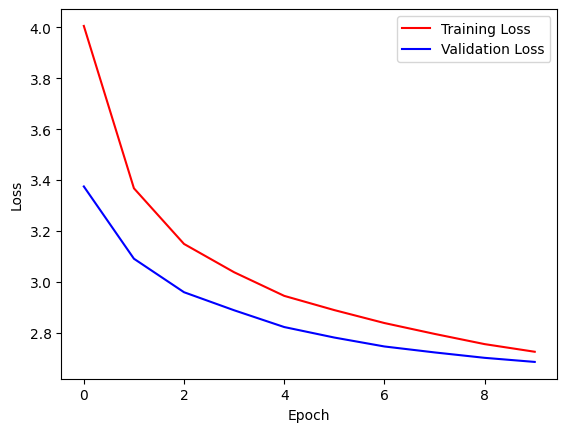

Test loss, Test accuracy (transfer learning): [2.658935546875, 0.33500000834465027]


In [19]:
# Train the model
history_transfer = transfer_model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

# Plot training & validation loss for transfer learning model
loss = history_transfer.history['loss']
val_loss = history_transfer.history['val_loss']
plt.figure()
plt.plot(history_transfer.epoch, loss, 'r', label='Training Loss')
plt.plot(history_transfer.epoch, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the transfer learning model
results_transfer = transfer_model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy (transfer learning):', results_transfer)

# Fine-tuning: Unfreeze the top layers of the base model
vgg_base.trainable = True

# Only fine-tune the top layers by setting a lower learning rate
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 163ms/step - accuracy: 0.3385 - loss: 2.5982 - val_accuracy: 0.3872 - val_loss: 2.3735
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.3900 - loss: 2.3235 - val_accuracy: 0.4107 - val_loss: 2.2485
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.4182 - loss: 2.1763 - val_accuracy: 0.4305 - val_loss: 2.1596
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.4417 - loss: 2.0658 - val_accuracy: 0.4407 - val_loss: 2.0953
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.4677 - loss: 1.9638 - val_accuracy: 0.4507 - val_loss: 2.0636
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.4792 - loss: 1.8929 - val_accuracy: 0.4616 - val_loss: 2.0134
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.5022 - loss: 1.8141 - val_accuracy: 0.4706 - val_loss: 1.9691
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.5199 - loss: 1

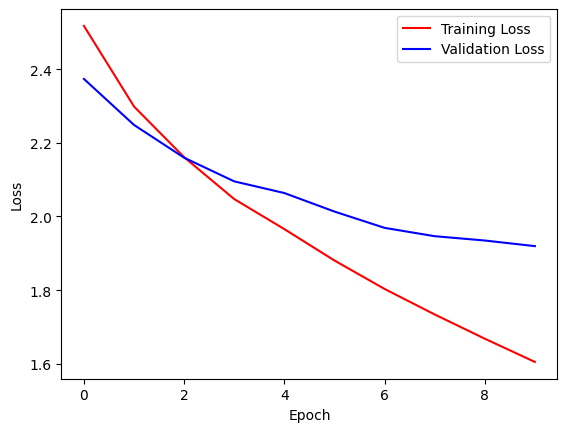

Test loss, Test accuracy (fine-tuning): [1.8825335502624512, 0.4916999936103821]


In [20]:
# Train the model again with fine-tuning
history_finetune = transfer_model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

# Plot training & validation loss for fine-tuning
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']
plt.figure()
plt.plot(history_finetune.epoch, loss, 'r', label='Training Loss')
plt.plot(history_finetune.epoch, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the fine-tuned model
results_finetune = transfer_model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy (fine-tuning):', results_finetune)
